# Texas Saftey Analysis
---
### As part of this activity, Criminal activity by each COUNTY will be analyzed and will be assigned as livablity score.

Observation:

1. Based on analysis it is found Harris County has the total record of 8146 Offenses followed by Tarrant (5917 -Offnese) and Bexar Counties(4317).

2. Year 2018 has the highest offense records. Most of them were intoxicated driving, sex offenders duty to register and they are classified as Other category.

3. Year 2020 has the lowest offense records. This can be primarily due to lack of information for that year.

4. The county with the highest Offense rate is Harris county with an whopping 12.86 offense Percentage.

5. The county with smallest offense percent is Armstrong county with 0.01 percentage.

6. Counties are given Safety Index based on their Offense Percent with 5 being the best and 1 being the worst.

7. Total of 42 counties gets the best rating (5) and 32 counties get the worst rating (1).


Reference and Dataset Link: https://data.texas.gov/browse?Dataset-Category_Category-Tile=Public+Safety

---

**-- Limitation : --** Based on analysis we understand 2020 records are not complete/ not published for the public.

## Dependencies and Setup

In [22]:
# import required libiraries/packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import  pprint
import hvplot.pandas


### Import datafile and creat clean dataframe

In [30]:
# Import datasets csv file or import data set through API

# Read the data
safety_2019 = pd.read_csv("../Resources/Texas_Department_of_Criminal_Justice_Receives_FY_2019.csv")
safety_2020 = pd.read_csv("../Resources/Texas_Department_of_Criminal_Justice_Releases_FY_2020.csv")

# Cleanup and Create dataframe

# Remove duplicates in CSV
safety_2019 = safety_2019.drop_duplicates()
safety_2019.to_csv('cleaned_2019.csv', index=False)

safety_2020 = safety_2020.drop_duplicates()
safety_2020.to_csv('cleaned_2020.csv', index=False)

# Filtering out years (2017 - 2020)
df1_filtered = safety_2019[(pd.to_numeric(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y')) >= 2017) & ((pd.to_numeric(pd.to_datetime(safety_2019['Offense Date']).dt.strftime('%Y'))) < 2020)]
df2_filtered = safety_2020[(pd.to_numeric(pd.to_datetime(safety_2020['Offense Date']).dt.strftime('%Y')) >= 2017) & ((pd.to_numeric(pd.to_datetime(safety_2020['Offense Date']).dt.strftime('%Y'))) < 2021)]

# Select Columns to make DtaFrame
safety_2019_selcols = pd.DataFrame(df1_filtered[['County', 'Offense', 'Offense Description', 'Offense Date']])
safety_2020_selcols = pd.DataFrame(df2_filtered[['County', 'Offense', 'Offense Description', 'Offense Date']])


# concat 2019 & 2020 Data Frame
merged_df = pd.concat([safety_2019_selcols,safety_2020_selcols],axis=0)
merged_df = merged_df.drop_duplicates()

# Sorting the Data Frame based on based on County & Offense Date
merged_df = merged_df.sort_values(by=['County','Offense Date'],ascending=True).reset_index(drop=True)

# Formatting the Dataframe
merged_df['Offense Year'] = pd.to_datetime(merged_df['Offense Date']).dt.strftime('%Y')
merged_df = merged_df.rename(columns={'County':'COUNTY'})
merged_df['Offense Count']=0

# Display Dataframe
merged_df.head()


,COUNTY,Offense,Offense Description,Offense Date,Offense Year,Offense Count
0,Anderson,Drug,POSS CS PG 1 >=1G<4G,01/03/2017,2017,0
1,Anderson,Drug,POSS CONT SUBS PG1 1-4G,01/03/2017,2017,0
2,Anderson,Property,"THEFT PROP <$2,500 2/MORE PREV CONV",01/06/2018,2018,0
3,Anderson,Property,THEFT PROP L/$2500 2/MORE PREV,01/06/2018,2018,0
4,Anderson,Other,DRIVING WHILE INTOXICATED W/CHILD UNDER 15 YOA,01/15/2018,2018,0


In [24]:
#groupby county and offense & generate a hvplot.bar
OffenseCountByCountyDF = merged_df.groupby(['COUNTY','Offense Year'],as_index=False)['Offense Count'].count()
OffenseCountByCountyDF['AVG_OFFENCE_COUNT'] = OffenseCountByCountyDF['Offense Count']
OffenseCountByCountyDF = OffenseCountByCountyDF.groupby(['COUNTY'],as_index=False).agg({'AVG_OFFENCE_COUNT':'mean','Offense Count':'sum'})
OffenseCountByCountyDF['AVG_OFFENCE_COUNT'] = OffenseCountByCountyDF['AVG_OFFENCE_COUNT'].apply(np.ceil)

OffenseCountByCountyDF.hvplot.bar(y='Offense Count',color ='COUNTY',cmap='set1', 
                            width = 2000, height= 500,rot =180,legend='left')

:Bars   [index]   (Offense Count,COUNTY)

In [25]:
# Create a new column with the count of offenses for each combination of County, Offense, and Offense Year & generate a hvplot.bar
OffenseCountByCountyAndYearDF = merged_df.groupby(['COUNTY', 'Offense', 'Offense Year'],as_index=False)['Offense Count'].count()
OffenseCountByCountyAndYearDF.hvplot.bar(x =  'Offense', y='Offense Count',color ='Offense Year',cmap='set1')


:Bars   [Offense]   (Offense Count,Offense Year)

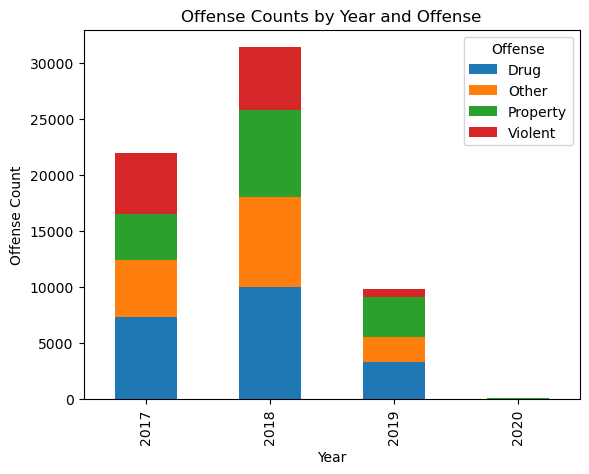

In [26]:
# generate a stacked barplot for the county and offense count
# Group the DataFrame by Offense Year and Offense, and sum the Offense Count
OffenseCountYearDF = merged_df.groupby(['Offense Year', 'Offense'])['Offense Count'].count()

# Unstack the resulting Series to create a DataFrame with Offense Year as columns
stacked = OffenseCountYearDF.unstack()

# Plot the stacked bar plot
stacked.plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Offense Counts by Year and Offense')
plt.xlabel('Year')
plt.ylabel('Offense Count')

# Show the plot
plt.show()

In [27]:
# Generating summary Statistics - Calculate Offense Percentage
TotalOffenseCount = OffenseCountByCountyDF['Offense Count'].sum()
OffenseCountByCountyDF['OFFENSE_PCT'] = OffenseCountByCountyDF['Offense Count']/TotalOffenseCount * 100

# Find out Min and Max Offense Percentage
minValueIndex = OffenseCountByCountyDF['OFFENSE_PCT'].idxmin()
maxValueIndex = OffenseCountByCountyDF['OFFENSE_PCT'].idxmax()
print("The county with lowest crime rate is " + str(OffenseCountByCountyDF['COUNTY'][minValueIndex]) + " County with crime rate " +  str(OffenseCountByCountyDF['OFFENSE_PCT'][minValueIndex]))
print("The county with Higest crime rate is " + str(OffenseCountByCountyDF['COUNTY'][maxValueIndex]) + " County with crime rate " +  str(OffenseCountByCountyDF['OFFENSE_PCT'][maxValueIndex]))
display(OffenseCountByCountyDF)

The county with lowest crime rate is Armstrong County with crime rate 0.001578731331502005
The county with Higest crime rate is Harris County with crime rate 12.860345426415332


,COUNTY,AVG_OFFENCE_COUNT,Offense Count,OFFENSE_PCT
0,Anderson,43.0,128,0.202078
1,Andrews,16.0,48,0.075779
2,Angelina,114.0,341,0.538347
3,Aransas,18.0,53,0.083673
4,Archer,4.0,10,0.015787
...,...,...,...,...
245,Wood,40.0,120,0.189448
246,Yoakum,4.0,8,0.012630
247,Young,18.0,54,0.085251
248,Zapata,2.0,4,0.006315


In [28]:
# Generating extract for 254 counties
TexasCountyDF = pd.read_excel('../Resources/Texas_Counties.xlsx')
TexasCountyDF['COUNTY'] = TexasCountyDF['Name']
merged_county_df = pd.merge(OffenseCountByCountyDF,TexasCountyDF, on = 'COUNTY' , how='right')
merged_county_df = merged_county_df.fillna(0)
SummaryStatisticsDF = merged_county_df.drop(['Rank','Name','Named For'],axis=1)

# Display Dataframe
SummaryStatisticsDF

,COUNTY,AVG_OFFENCE_COUNT,Offense Count,OFFENSE_PCT
0,Anderson,43.0,128.0,0.202078
1,Andrews,16.0,48.0,0.075779
2,Angelina,114.0,341.0,0.538347
3,Aransas,18.0,53.0,0.083673
4,Archer,4.0,10.0,0.015787
...,...,...,...,...
249,Wood,40.0,120.0,0.189448
250,Yoakum,4.0,8.0,0.012630
251,Young,18.0,54.0,0.085251
252,Zapata,2.0,4.0,0.006315


In [29]:
# Calculating Liviablity index and export to csv
SummaryStatisticsDF['SAFTEY_LINDEX'] = np.where(SummaryStatisticsDF['OFFENSE_PCT'] <= .01, 5,
                             np.where(SummaryStatisticsDF['OFFENSE_PCT'] <= 0.05, 4,
                             np.where(SummaryStatisticsDF['OFFENSE_PCT'] <= 0.1, 3,
                             np.where(SummaryStatisticsDF['OFFENSE_PCT'] <= 0.8, 2, 1))))                                          
# Dispaly Dataframe
display(SummaryStatisticsDF)
# 
SummaryStatisticsDF.to_csv("../output/safety_analysis.csv",index=False)   

,COUNTY,AVG_OFFENCE_COUNT,Offense Count,OFFENSE_PCT,SAFTEY_LINDEX
0,Anderson,43.0,128.0,0.202078,2
1,Andrews,16.0,48.0,0.075779,3
2,Angelina,114.0,341.0,0.538347,2
3,Aransas,18.0,53.0,0.083673,3
4,Archer,4.0,10.0,0.015787,4
...,...,...,...,...,...
249,Wood,40.0,120.0,0.189448,2
250,Yoakum,4.0,8.0,0.012630,4
251,Young,18.0,54.0,0.085251,3
252,Zapata,2.0,4.0,0.006315,5
